<a href="https://colab.research.google.com/github/rontalapoojareddy/ADS_Assignment/blob/main/ADS_Lab_Test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Question 1
# 1.Load the dataset and display summary statistics of all features.
import pandas as pd

df = pd.read_excel("/content/KNN_regression_dataset.xlsx")
print("===== Dataset Loaded Successfully =====")
print(df.head())
print("\n===== Summary Statistics =====")
print(df.describe())

===== Dataset Loaded Successfully =====
   FlowRate_LPM  InletTemp_C  PressureDrop_kPa  Efficiency_%
0      4.370861    31.107976          1.677676      8.153855
1      9.556429    52.514057          1.611405     19.832165
2      7.587945    72.376750          4.578146     30.023816
3      6.387926    63.933493          1.622958     19.201464
4      2.404168    68.393669          1.723774     26.920821

===== Summary Statistics =====
       FlowRate_LPM  InletTemp_C  PressureDrop_kPa  Efficiency_%
count   1000.000000  1000.000000       1000.000000   1000.000000
mean       5.412309    50.421038          2.760826     17.582045
std        2.629236    17.531394          1.308034      6.574029
min        1.041688    20.193096          0.500052      0.572450
25%        3.123759    34.464456          1.676079     12.967408
50%        5.471266    51.124034          2.752763     17.834897
75%        7.698876    65.627903          3.915966     22.455350
max        9.997459    79.964824          

In [4]:
# 2. Split the data into 80% training and 20% testing sets.
from sklearn.model_selection import train_test_split

X = df.drop("Efficiency_%", axis=1)
y = df["Efficiency_%"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n===== Train-Test Split Done =====")
print("Training Samples:", len(X_train))
print("Testing Samples:", len(X_test))


===== Train-Test Split Done =====
Training Samples: 800
Testing Samples: 200


In [5]:
# 3. Standardize/scale the input features appropriately.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n===== Feature Scaling Completed =====")
print("Sample Scaled Values (First 5 rows):")
print(X_train_scaled[:5])


===== Feature Scaling Completed =====
Sample Scaled Values (First 5 rows):
[[-1.5340594   1.07782942  0.50747353]
 [ 1.536054   -1.3453489   1.12953535]
 [ 0.39406618 -1.52944037  0.04035744]
 [-1.59444126 -0.35438083 -0.71822343]
 [ 1.43379897 -1.32406676  1.67949657]]


In [6]:
# 4. Build a KNN Regression model with k = 5 to predict Efficiency (%).
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("\n===== KNN Model (k=5) Trained Successfully =====")


===== KNN Model (k=5) Trained Successfully =====


In [7]:
# 5.Use the model to predict the target values for the test set.

y_pred = knn.predict(X_test_scaled)

print("\n===== Predictions on Test Set =====")
print(y_pred[:10])  # first 10 predictions



===== Predictions on Test Set =====
[19.1733342  15.13746261 17.37842408 13.16854619 12.60638194 15.64227166
  7.04379573 11.82742047 23.55284685 22.33910876]


In [8]:
# 6. Evaluation Metrics
'''  Calculate and report the following evaluation metrics:
Mean Absolute Error (MAE)
Root Mean Squared Error (RMSE)
R² Score
'''
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n===== Evaluation Metrics =====")
print("MAE  =", mae)
print("RMSE =", rmse)
print("R²   =", r2)



===== Evaluation Metrics =====
MAE  = 2.3897091457722746
RMSE = 2.8723211358453233
R²   = 0.8284546105825977


In [12]:
# Question 2
#1.Studying effect of different k values
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

scores = {}

print("---- Training KNN Models ----")

for k in [1, 3, 5, 10]:
    print(f"\nTraining model with k = {k}")

    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    print(f"Model with k = {k} trained successfully.")

    pred = model.predict(X_test_scaled)
    print(f"Predictions for k = {k} generated.")

    r2 = r2_score(y_test, pred)
    print(f"R² Score for k = {k}: {r2}")

    scores[k] = r2

print("\nAll models trained successfully.")
print("R² Scores for all k values:", scores)

---- Training KNN Models ----

Training model with k = 1
Model with k = 1 trained successfully.
Predictions for k = 1 generated.
R² Score for k = 1: 0.8054602447277666

Training model with k = 3
Model with k = 3 trained successfully.
Predictions for k = 3 generated.
R² Score for k = 3: 0.8257172645488212

Training model with k = 5
Model with k = 5 trained successfully.
Predictions for k = 5 generated.
R² Score for k = 5: 0.8284546105825977

Training model with k = 10
Model with k = 10 trained successfully.
Predictions for k = 10 generated.
R² Score for k = 10: 0.8471971526372565

All models trained successfully.
R² Scores for all k values: {1: 0.8054602447277666, 3: 0.8257172645488212, 5: 0.8284546105825977, 10: 0.8471971526372565}


In [9]:
#2. For each model, compute and record the R² Score on the test data.
scores = {}
k_list = [1, 3, 5, 10]

print("\n===== R² Scores for Different k Values =====")

for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, pred)
    scores[k] = r2
    print(f"k = {k} → R² = {r2}")


===== R² Scores for Different k Values =====
k = 1 → R² = 0.8054602447277666
k = 3 → R² = 0.8257172645488212
k = 5 → R² = 0.8284546105825977
k = 10 → R² = 0.8471971526372565



===== Plotting k vs R² Graph =====


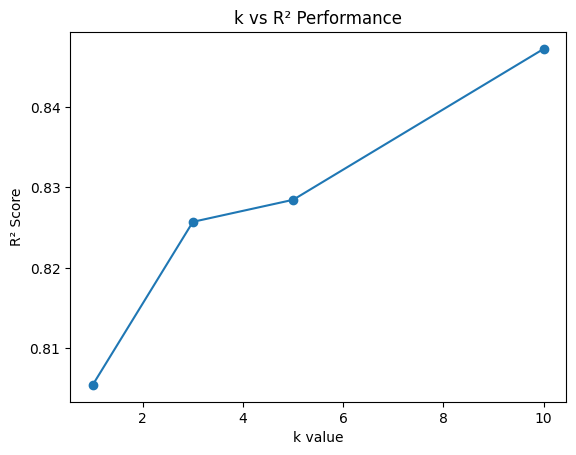

In [10]:
# 3.Plotting k vs R² Score
import matplotlib.pyplot as plt

k_values = list(scores.keys())
r2_values = list(scores.values())

print("\n===== Plotting k vs R² Graph =====")

plt.plot(k_values, r2_values, marker='o')
plt.xlabel("k value")
plt.ylabel("R² Score")
plt.title("k vs R² Performance")
plt.show()

In [16]:
# . Best k value  Identify which value of k gives the best performance.
best_k = max(scores, key=scores.get)
print("\n===== Best Performing k Value =====")
print(f"Best k = {best_k} with R² = {scores[best_k]}")


===== Best Performing k Value =====
Best k = 10 with R² = 0.8471971526372565
